In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title="Image", image=None, size=10):
    w,h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

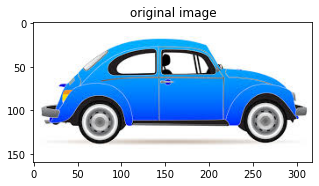

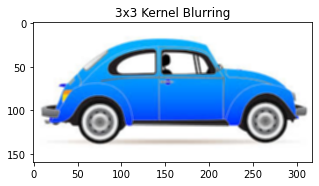

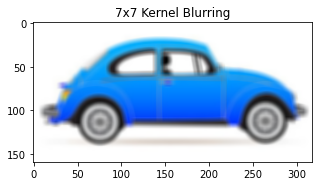

In [5]:
image = cv2.imread("images/beatle.jpg")
imshow("original image", image)

# Creating our 3x3 kernel
kernel_3x3 = np.ones((3,3), np.float32)/9

# Use cv2.filter2D to convolve the kernel with an image
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow("3x3 Kernel Blurring", blurred)

# Creating 7x7 kernel
kernel_7x7 = np.ones((7,7), np.float32)/49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow("7x7 Kernel Blurring", blurred2)

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

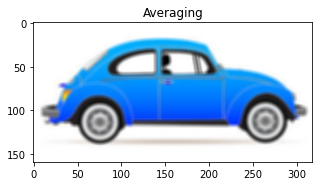

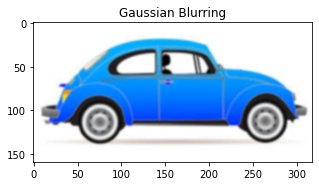

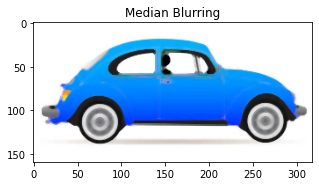

In [7]:
# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5))
imshow("Averaging", blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

 ### Denoising / Non-local means denoising

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:	

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

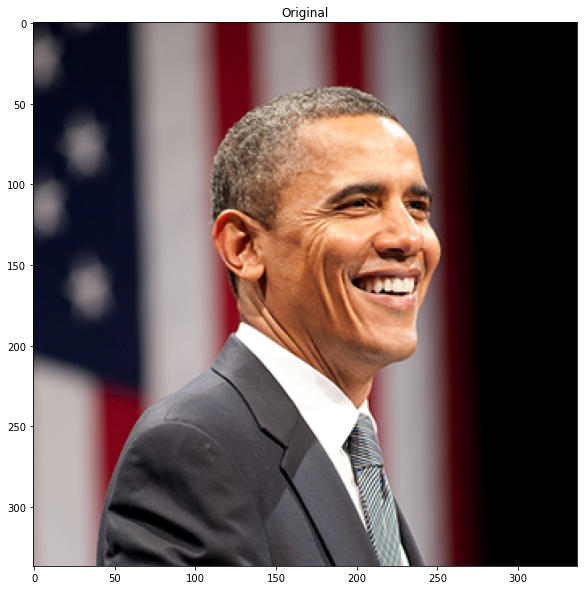

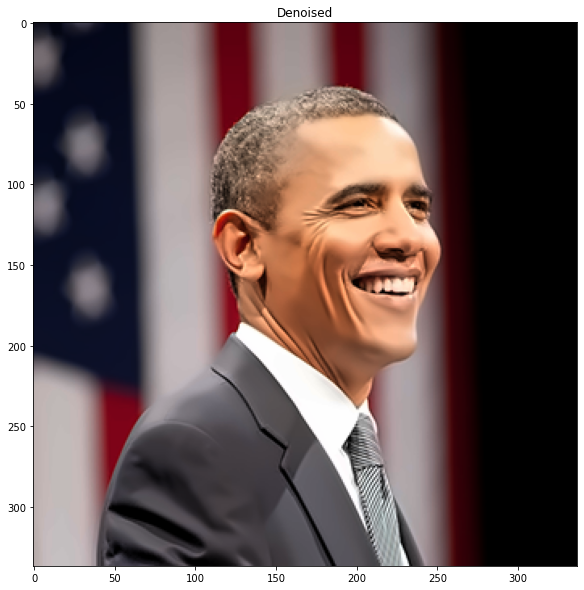

In [13]:
image = cv2.imread("images/obama.jpg")
imshow("Original", image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7)
imshow("Denoised", dst) # looks artificial

### Sharpening images - filter2D with kernel_sharpening

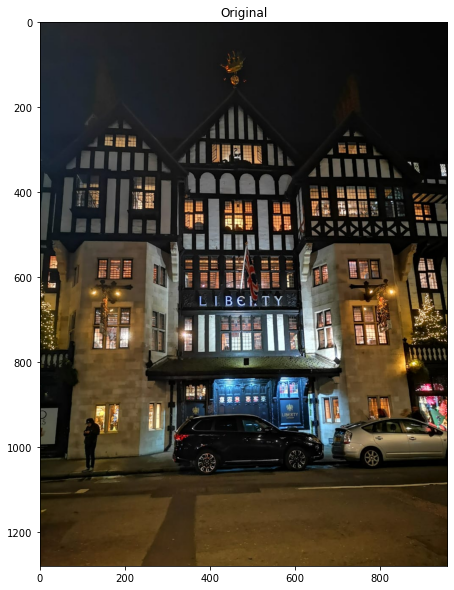

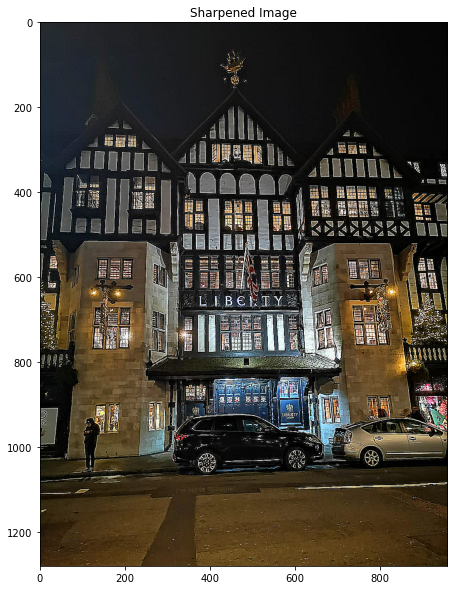

In [14]:
# Loading our image
image = cv2.imread('images/liberty.jpeg')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one 
# 9 number of elements in the matrix
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)